In [1]:
library(tidyverse)
library(repr)
library(RColorBrewer)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0     ✔ recipes   0.2.0
✔ dials     0.0.9     ✔ rsample   0.0.7
✔ infer     0.5.4     ✔ tune      0.1.1
✔ modeldata 0.0.2     ✔ workflows 0.2.0
✔ parsnip   0.1.3     ✔ yardstick 0.0.7

Warning message:
“package ‘broom’ was built under R vers

In [2]:
install.packages('themis')

library(themis)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘themis’


The following object is masked from ‘package:tune’:

    tunable


The following objects are masked from ‘package:recipes’:

    step_downsample, step_upsample




In [12]:
pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename(mean_ip = X1,
                      dev_ip = X2,
                      excess_ip = X3,
                      skewness_ip = X4,
                      mean_dm = X5,
                      dev_dm = X6,
                      excess_dm = X7,
                      skewness_dm = X8,
                      class = X9) %>%
                mutate(class = as.factor(class))
pulsar_data


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



mean_ip,dev_ip,excess_ip,skewness_ip,mean_dm,dev_dm,excess_dm,skewness_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


mean_ip,excess_ip
<dbl>,<dbl>
27.69304,2.846008


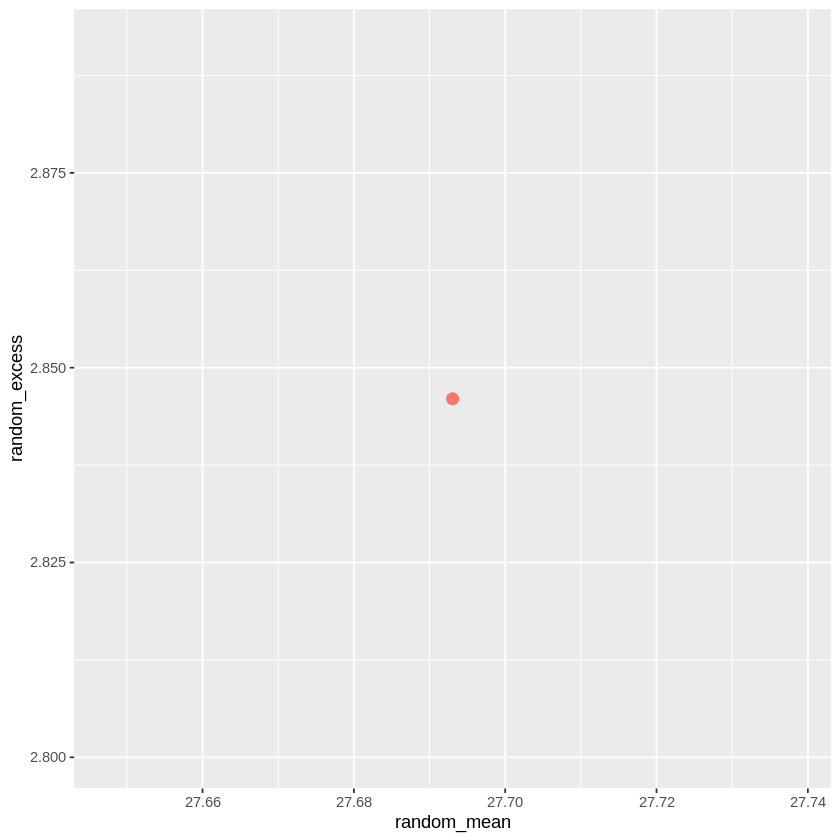

In [47]:
set.seed(19)
random_mean = runif(1, min = 5.8125000, max = 192.617188)
random_excess = runif(1, min = -1.8760112, max = 7.879628)
random_point = tibble(mean_ip = random_mean, excess_ip = random_excess)
random_point



plot <- ggplot() +
geom_point(aes(x = random_mean, y = random_excess), color = '#F8766D'/'#619CFF', size = 3)
plot

In [15]:
balance_pulsar <- pulsar_data %>%
                    sample_n(500) 

step_upsample {recipes},R Documentation
recipe,A recipe object. The step will be added to the sequence of operations for this recipe.
...,One or more selector functions to choose variables for this step. See selections() for more details.
over_ratio,A numeric value for the ratio of the majority-to-minority frequencies. The default value (1) means that all other levels are sampled up to have the same frequency as the most occurring level. A value of 0.5 would mean that the minority levels will have (at most) (approximately) half as many rows than the majority level.
ratio,Deprecated argument; same as over_ratio.
role,Not used by this step since no new variables are created.
trained,A logical to indicate if the quantities for preprocessing have been estimated.
column,A character string of the variable name that will be populated (eventually) by the ... selectors.
target,An integer that will be used to subsample. This should not be set by the user and will be populated by prep.
skip,"A logical. Should the step be skipped when the recipe is baked by bake()? While all operations are baked when prep() is run, some operations may not be able to be conducted on new data (e.g. processing the outcome variable(s)). Care should be taken when using skip = TRUE as it may affect the computations for subsequent operations."
seed,An integer that will be used as the seed when upsampling.


In [9]:
install.packages('ROSE')
library(ROSE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loaded ROSE 0.0-4




In [36]:
set.seed(19)
pulsar <- ovun.sample(class~., data = balance_pulsar, p = 0.5, method = "over")$data
pulsar_nums <- pulsar %>%
                group_by(class) %>%
                summarize(n = n())
pulsar_nums

`summarise()` ungrouping output (override with `.groups` argument)


class,n
<fct>,<int>
0,453
1,458


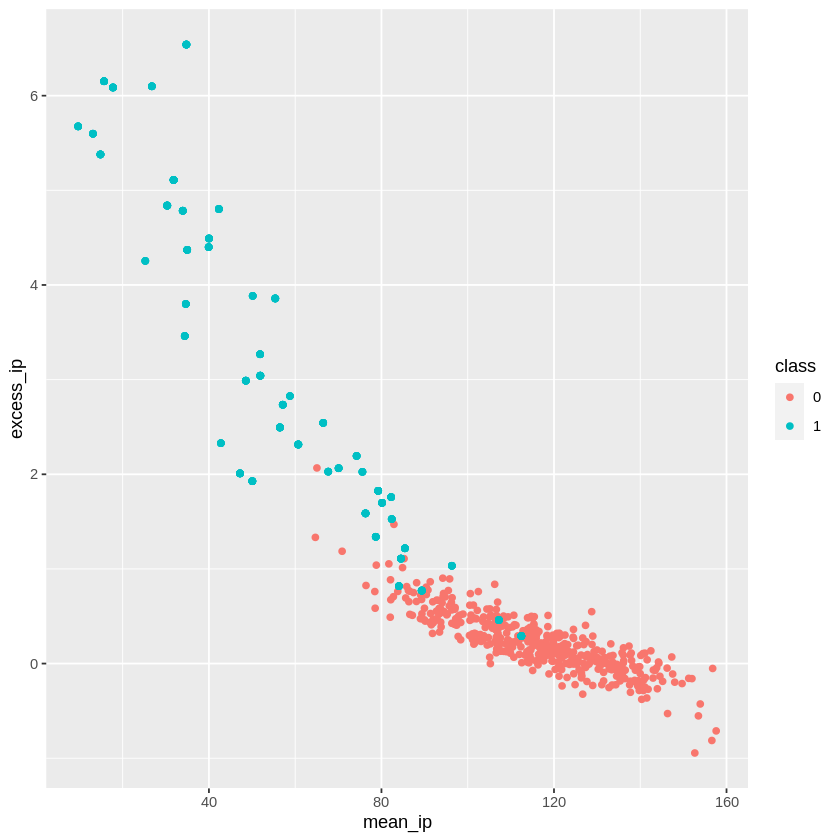

In [37]:
pulsar_plot <- ggplot(pulsar, aes(x = mean_ip, y = excess_ip, color = class)) +
                geom_point()
pulsar_plot

In [38]:
## Copied from Avishka's notebook
set.seed(19)

#Splitting our data

pulsar_split <- initial_split(pulsar, prop = 0.75, strata = class)  
pulsar_training_data <- training(pulsar_split)   
pulsar_testing_data <- testing(pulsar_split)

#Cross validation
pulsar_vfold <- vfold_cv(pulsar_training_data, v = 5, strata = class)

#knn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

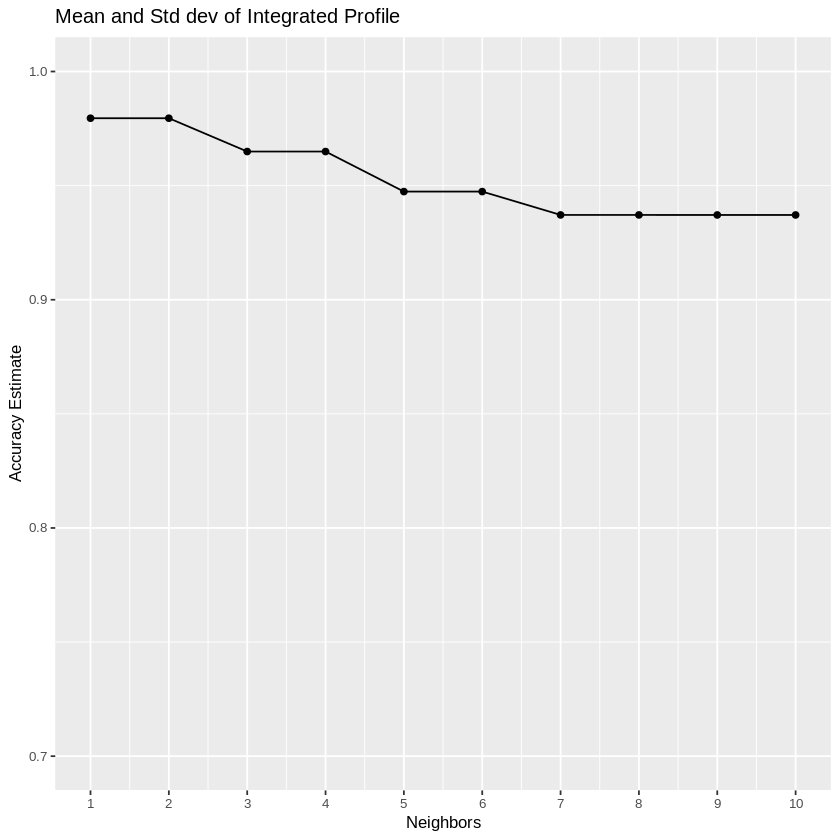

In [39]:
## Copied from Avishka's notebook

set.seed(19)

pulsar_ip_recipe_1 <- recipe(class ~ mean_ip + dev_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors()) %>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_ip_results_1 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_1) %>%
       collect_metrics() %>%
       filter(.metric == "accuracy")

ip_plot_1 <- ggplot(knn_ip_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of Integrated Profile") +
       theme(text = element_text(size = 10)) 
ip_plot_1

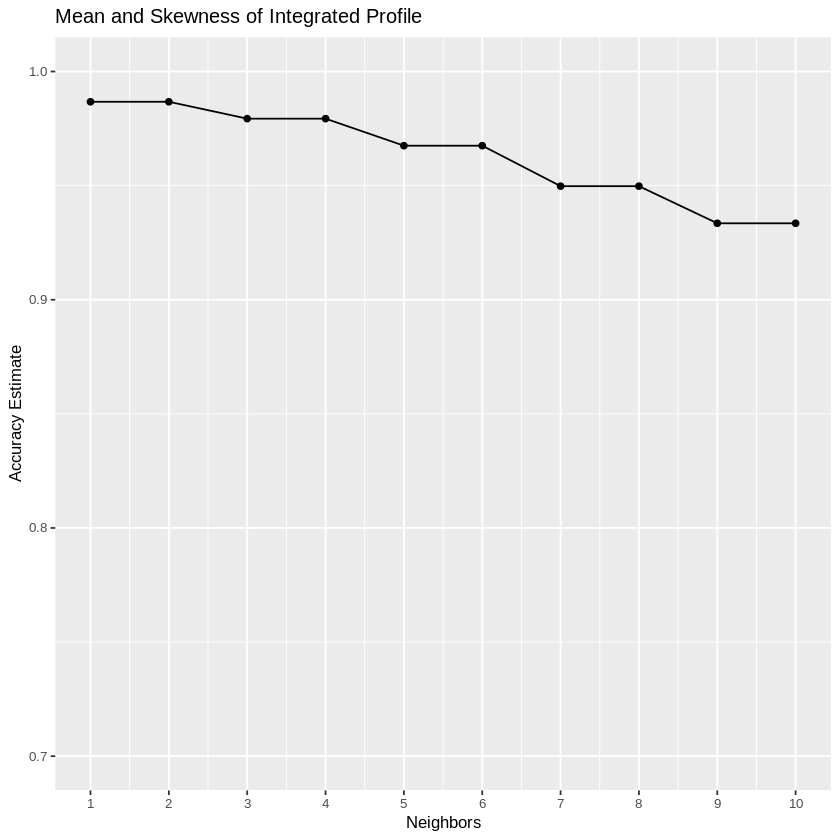

In [32]:
## Copied from Avishka's notebook
set.seed(19)

pulsar_ip_recipe_2 <- recipe(class ~ mean_ip + skewness_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_ip_results_2 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_2 <- ggplot(knn_ip_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of Integrated Profile") +
       theme(text = element_text(size = 10)) 
ip_plot_2

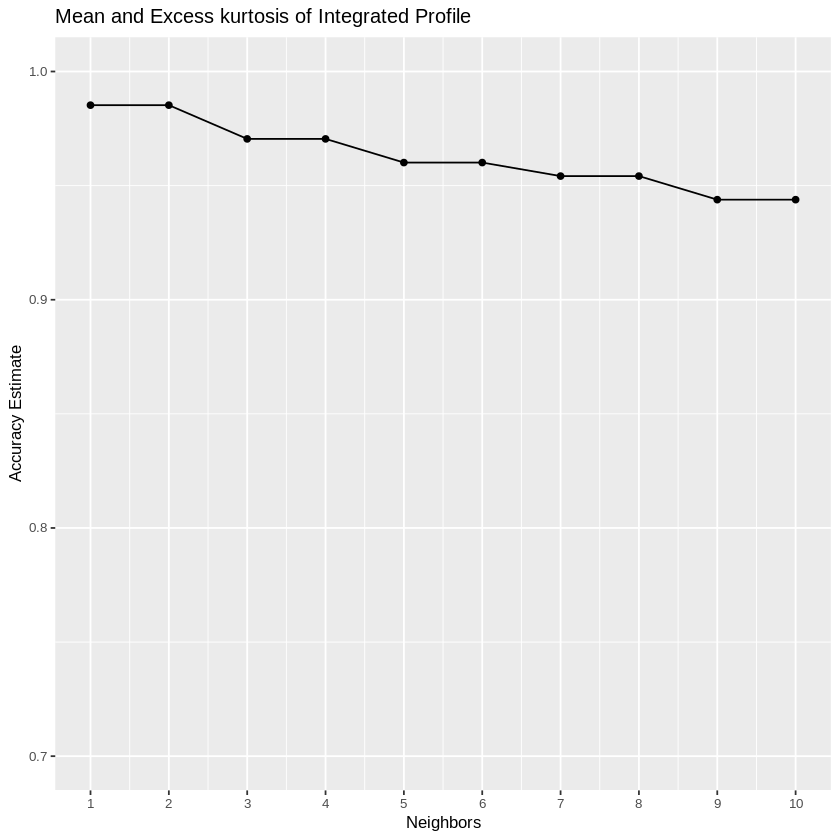

In [34]:
## Copied from Avishka's notebook
set.seed(19)

pulsar_ip_recipe_3 <- recipe(class ~ mean_ip + excess_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_ip_results_3 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_3 <- ggplot(knn_ip_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of Integrated Profile") +
       theme(text = element_text(size = 10)) 
ip_plot_3